Copyright 2020 DeepMind Technologies Limited.

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

In [ ]:
import tree
import numpy as np
from IPython import display
import tensorflow.compat.v2 as tf
from PIL import Image
tf.enable_v2_behavior()

In [ ]:
# Download Dataset
!wget http://storage.googleapis.com/dm_cmtouch/datasets/cmtouch_touch_props_all_im64_val.tfrecords -q
!wget http://storage.googleapis.com/dm_cmtouch/datasets/cmtouch_touch_objects_ycb_all_im64_val.tfrecords -q 

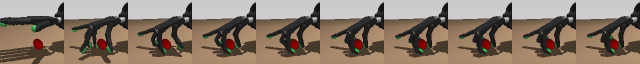

In [ ]:
#@title Read CMTouch Props

record_file = 'cmtouch_touch_props_all_im64_val.tfrecords' #@param
dataset = tf.data.TFRecordDataset(record_file)

# Create a dictionary describing the features.
feature_description = {
    'sequence_length': tf.io.FixedLenFeature([], tf.int64),
    'camera': tf.io.FixedLenFeature([], tf.string),
    'camera/height': tf.io.FixedLenFeature([], tf.int64),
    'camera/width': tf.io.FixedLenFeature([], tf.int64),
    'camera/channel': tf.io.FixedLenFeature([], tf.int64),
    'shadowhand_motor/joints_vel': tf.io.FixedLenFeature([], tf.string),
    'shadowhand_motor/joints_vel/dim': tf.io.FixedLenFeature([], tf.int64),
    'shadowhand_motor/joints_pos': tf.io.FixedLenFeature([], tf.string),
    'shadowhand_motor/joints_pos/dim': tf.io.FixedLenFeature([], tf.int64),
    'shadowhand_motor/spatial_touch': tf.io.FixedLenFeature([], tf.string),
    'shadowhand_motor/spatial_touch/dim': tf.io.FixedLenFeature([], tf.int64),
    'actions': tf.io.FixedLenFeature([], tf.string),
    'actions/dim': tf.io.FixedLenFeature([], tf.int64),
}


def _parse_tf_example(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  example = tf.io.parse_single_example(example_proto, feature_description)
  data = {}
  for scalar_data_key, dtype in [
      ('shadowhand_motor/joints_vel', tf.float32),
      ('shadowhand_motor/joints_pos', tf.float32),
      ('shadowhand_motor/spatial_touch', tf.float32),
      ('actions', tf.float32),
  ]:
    data[scalar_data_key] = tf.reshape(
        tf.io.decode_raw(example[scalar_data_key], dtype),
        [-1, example[f'{scalar_data_key}/dim']])

  for image_data_key, dtype in [('camera', tf.uint8)]:
    data[image_data_key] = tf.reshape(
        tf.io.decode_raw(example[image_data_key], dtype), [
            -1, example[f'{image_data_key}/height'],
            example[f'{image_data_key}/width'],
            example[f'{image_data_key}/channel']
        ])

  return data


parsed_dataset = dataset.map(_parse_tf_example)
for data in parsed_dataset.take(1):
  display.display(
      Image.fromarray(np.concatenate(data['camera'].numpy()[::20], axis=1)))

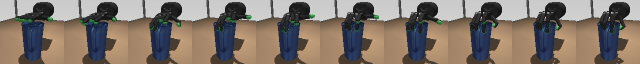

In [ ]:
#@title Read CMTouch YCB

record_file = 'cmtouch_touch_objects_ycb_all_im64_val.tfrecords'  #@param 
dataset = tf.data.TFRecordDataset(record_file)

# Create a dictionary describing the features.
feature_description = {
    'sequence_length': tf.io.FixedLenFeature([], tf.int64),
    'camera': tf.io.FixedLenFeature([], tf.string),
    'camera/height': tf.io.FixedLenFeature([], tf.int64),
    'camera/width': tf.io.FixedLenFeature([], tf.int64),
    'camera/channel': tf.io.FixedLenFeature([], tf.int64),
    'object_id': tf.io.FixedLenFeature([], tf.string),  # for both
    'object_id/dim': tf.io.FixedLenFeature([], tf.int64),
    'orientation_id': tf.io.FixedLenFeature([], tf.string),  # only for ycb
    'orientation_id/dim': tf.io.FixedLenFeature([], tf.int64),
    'shadowhand_motor/joints_vel': tf.io.FixedLenFeature([], tf.string),
    'shadowhand_motor/joints_vel/dim': tf.io.FixedLenFeature([], tf.int64),
    'shadowhand_motor/joints_pos': tf.io.FixedLenFeature([], tf.string),
    'shadowhand_motor/joints_pos/dim': tf.io.FixedLenFeature([], tf.int64),
    'shadowhand_motor/spatial_touch': tf.io.FixedLenFeature([], tf.string),
    'shadowhand_motor/spatial_touch/dim': tf.io.FixedLenFeature([], tf.int64),
    'actions': tf.io.FixedLenFeature([], tf.string),
    'actions/dim': tf.io.FixedLenFeature([], tf.int64),
}


def _parse_tf_example(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  example = tf.io.parse_single_example(example_proto, feature_description)
  data = {}
  for scalar_data_key, dtype in [
      ('object_id', tf.float32),
      ('orientation_id', tf.float32),
      ('shadowhand_motor/joints_vel', tf.float32),
      ('shadowhand_motor/joints_pos', tf.float32),
      ('shadowhand_motor/spatial_touch', tf.float32),
      ('actions', tf.float32),
  ]:
    data[scalar_data_key] = tf.reshape(
        tf.io.decode_raw(example[scalar_data_key], dtype),
        [-1, example[f'{scalar_data_key}/dim']])

  for image_data_key, dtype in [('camera', tf.uint8)]:
    data[image_data_key] = tf.reshape(
        tf.io.decode_raw(example[image_data_key], dtype), [
            -1, example[f'{image_data_key}/height'],
            example[f'{image_data_key}/width'],
            example[f'{image_data_key}/channel']
        ])

  return data


parsed_dataset = dataset.map(_parse_tf_example)
for data in parsed_dataset.take(1):
  display.display(
      Image.fromarray(np.concatenate(data['camera'].numpy()[::20], axis=1)))